# Julia 5: Linear Algebra. Random numbers and statistics. DataFrames and File handling
### Bernt Lie
#### University of South-Eastern Norway
#### May, 2021. Minor updates June 2023, September 2023

## Learning goals
In this session, we will look at:
* Linear algebra
* Offset arrays
* Random numbers and statistics
* DataFrames and File handling

In [1]:
# How to write matrices and vectors?
# v = [1,2,3]
# A = [1 2 3; 2 3 4]
# MATLAB-files *.mat
# Vectors: separation by comma versus semi-colon in concatenation

## Linear Algebra
Here, we consider packages `LinearAlgebra` and `SparseArrays`. We will also consider package `Plots` with command `spy`, which plots the sparse structure of a matrix, and has attributes being a subset of those for scatter plots.

### Creating vectors and matrices

In the section on collections and *arrays*, we saw how to create general arrays, including vectors and matrices. Remember: arrays are mutable objects in Julia, i.e., it is possible to change the elements of an array after it has been created.

#### Vector
In Julia, a *vector* is a one-dimensional array, where elements are comma-separated (or semicolon-separated) within square brackets, e.g.:

```julia
v = [v1, v2, v3,..., vn]
```
For linear algebra purposes, each element should be a *scalar*.

*Note*: if the elements are *vectors* in themselves, *comma-separation* creates a *vector of vectors*, while *semicolon-separation* stacks the elements below each other and creates a *vector of scalars*. A vector of equally sized vector elements an be converted to a matrix, see below.

#### Matrix
In Julia, a *matrix* is a two-dimensional array, where row elements are separated by *space*, while rows are separated by *semicolon ";"* or carriage return, e.g.:

```julia
A = [a11 a12 a13; a21 a22 a23]
# or
B = [b11 b12 b13
        b21 b22 b23]
```
If we create data which consist of a vector of equally sized, comma-separated vector elements (typically: by logging experiments, etc.), these can be converted to matrices via the `reduce(hcat,...)` command. The alternative `reduce(vcat,vector)` leads to a vector, and is similar to the semicolon-separated vector of vector elements.

*Identity Matrix*: in Julia, it is possible to write the identify matrix as `I`. Note that this is a square matrix

#### Empty array 
Constructions `Array{T}(undef,dims)` creates an "empty" vector of data type `T` if `dims` is a scalar positive integer or a singleton tuple of a positive integer, and an "empty" matrix of data type `T` if dims is a tuple of positive integers or a sequence of two positive integers. The vector/matrix contains arbitrary element values taken from what already was stored in the memory locations the vector/matrix has been assigned.

It is possible to replace `Array` with `Vector` when `dims` is a scalar positive integer or a singleton positive integer tuple -- with `Vector`, an error is flagged if `dims` is a sequence of more than one integer, or a tuple with more than one element, or a negative integer is used in `dims`. It is possible to create a vector with `dims` set to zero.

Similarly, it is possible to replace `Array` with `Matrix` when `dims` is a sequence of two positive integers, or a pair of two positive integers -- just like for `Vector`, and error is flagged if `dims` does not satisfy the requirements of a matrix.

#### Zero array
Command `zeros([T=Float64,] dims)` constructs a vector of zeros if `dims` is a scalar positive integer or a singleton tuple, and a matrix of zeros if `dims` is a sequence of two positive integers or a pair (tuple) of positive integers .

#### Unit array
Command `zeros([T=Float64,] dims)` constructs a vector of unit elements if `dims` is a scalar positive integer or a singleton tuple, and a matrix of unit elements if `dims` is a sequence of two positive integers or a pair (tuple) of positive integers .


#### Fill array
Command `fill(x,dims)` creates an array where every element has value `x`. If `dims` is a scalar positive integer or a singleton tuple with positive integer element, the result is a vector. If `dims` is a sequence of two positive integers or a pair (tuple) of two positie integers, the result is a matrix.

#### Random array
Command `rand([C,] dims)` creates an array of dimension given by `dims`, where the elements are chosen by random from the set `C`. If `C` is not specified, the elements are chosen from floating point numbers in the range $[0,1)$. 


In [2]:
# Vector
v = [1,2,3]

3-element Vector{Int64}:
 1
 2
 3

In [3]:
u = [1;2;3]

3-element Vector{Int64}:
 1
 2
 3

In [4]:
# Vector of vectors
w = [[1,2], [-1,1],[2,3]]

3-element Vector{Vector{Int64}}:
 [1, 2]
 [-1, 1]
 [2, 3]

In [5]:
w |> x-> reduce(hcat,x)

2×3 Matrix{Int64}:
 1  -1  2
 2   1  3

In [6]:
w |> x-> reduce(vcat,x) |> permutedims  # permute dimensions to save space

1×6 Matrix{Int64}:
 1  2  -1  1  2  3

In [7]:
[[1,2]; [-1,1];[2,3]] |> permutedims

1×6 Matrix{Int64}:
 1  2  -1  1  2  3

In [8]:
# Matrix
A = [1 2 3;4 5 6]

2×3 Matrix{Int64}:
 1  2  3
 4  5  6

In [9]:
B = [1 2 3
    4 5 6]

2×3 Matrix{Int64}:
 1  2  3
 4  5  6

In [10]:
C = A

2×3 Matrix{Int64}:
 1  2  3
 4  5  6

In [11]:
# Memory location
objectid(A), objectid(B), objectid(C) # Observe that A and C has the same memory location

(0xcca371f815d56ea6, 0xf804915b6be0d020, 0xcca371f815d56ea6)

In [12]:
# Empty Array
Array{Int}(undef,3)

3-element Vector{Int64}:
 6949054226650628096
     123557625491568
                  96

In [13]:
Vector{Float16}(undef,(3,))

3-element Vector{Float16}:
   2.67e-5
 176.5
   2.89e-5

In [14]:
Vector{Int}(undef,0)

Int64[]

In [15]:
Array{Float32}(undef,2,3)

2×3 Matrix{Float32}:
 0.0  0.0  0.0
 0.0  0.0  0.0

In [16]:
Matrix{Int}(undef,(2,3))

2×3 Matrix{Int64}:
 2084581249664  2083647684368  140705361945104
             0              0                0

In [17]:
# Zero Array
zeros(Int,2,3)

2×3 Matrix{Int64}:
 0  0  0
 0  0  0

In [18]:
# Unit Array
ones(3) |> permutedims

1×3 Matrix{Float64}:
 1.0  1.0  1.0

In [19]:
# Fill Array
fill(3,(2,3))

2×3 Matrix{Int64}:
 3  3  3
 3  3  3

In [20]:
# Random Array
rand(3) |> permutedims

1×3 Matrix{Float64}:
 0.212125  0.18056  0.659879

In [21]:
rand(-3:3,2,3)

2×3 Matrix{Int64}:
  3  0   2
 -3  1  -3

### `LinearAlgebra` package
In addition to (and as part of) its support for multi-dimensional arrays, Julia provides native implementations of many common and useful linear algebra operations which can be by command with `using LinearAlgebra`. These routines mainly work for matrices, i.e., 2D arrays.

#### Basic operations
* **Trace**: `tr(A)` where `A` is a matrix
* **Rank**: `rank(A)` where `A` is a square matrix
* **Determinant**: `det(A)` where `A` is a square matrix
* **Inverse**: `inv(A)` where `A` is a square matrix

In [22]:
import LinearAlgebra as la

In [23]:
A = rand(-9:9,3,3)

3×3 Matrix{Int64}:
  0  -1  -6
 -9   1   8
 -1   3  -5

In [24]:
la.tr(A), la.rank(A), la.det(A)

(-4, 3, 209.0)

In [25]:
la.inv(A)

3×3 Matrix{Float64}:
 -0.138756  -0.110048    -0.00956938
 -0.253589  -0.0287081    0.258373
 -0.124402   0.00478469  -0.0430622

In [26]:
la.inv(la.I)

LinearAlgebra.UniformScaling{Float64}
1.0*I

In [27]:
la.inv(A+la.I)

3×3 Matrix{Float64}:
 -0.197531  -0.135802    0.0246914
 -0.271605  -0.0617284   0.283951
 -0.154321  -0.0123457  -0.0432099

#### Special types of matrices
Julia's `LinearAlgebra` package supports a number of special matrix types, which allows for more efficient operation. Typically, with an existing, square matrix `A` as argument, they produce a new matrix that satisfies the type. 
* **Symmetric** matrix: `Symmetric(A)` produces a symmetric matrix from square matrix `A`, with optional arguments `:U` (default) and `:L`
* **Hermitian** matrix: `Hermitian(A)` produces a hermitian matrix from square matrix `A`, with optional arguments `:U` (default) and `:L`
* **UpperTriangular** matrix: `UpperTriangular(A)` produces an upper triangular matrix from square matrix `A`
* **UnitUpperTriangular** matrix: `UnitUpperTriangular(A)` produces an upper triangular matrix from square matrix `A`, with unit elements on the main diagonal
* **Lower Triangular** matrix: `LowerTriangular(A)` produces a lower triangular matrix from square matrix `A`
* **Unit Lower Triangular** matrix: `UnitLowerTriangular(A)` produces a lower triangular matrix from square matrix `A`, with unit elements on the main
* **Upper Hessenberg** matrix: `UpperHessenberg(A)` produces an upper Hessenberg matrix from *rectangular* matrix `A`
* **Tridiagnoal** matrix: `Tridiagonal(A)` produces tridiagonal matrix from square matrix `A`
* **Symmetric tridiagonal** matrix: `SymTridiagonal(A)` produces symmetric tridiagonal matrix from *symmetric* matrix `A`
* **Bidiagonal** matrix: `Bidiagonal(A)` produces bidiagonal matrix from *rectangular* matrix `A`, with **required** extra argument `:U` or `:L`
* **Diagonal** matrix: `Diagonal(A)` produces diagonal matrix from *rectangular* matrix `A`
* **Uniform scaling** matrix: `UniformScaling(x)` with scalar number `x` produces a diagonal matrix `x*I` where `I` is the identity matrix. The size of the resulting matrix scales to fit other matrices. A special case is `UniformScaling(1)` which has short form name `I`.

In [28]:
B = rand(-9:9,2,3)

2×3 Matrix{Int64}:
 7  -3   2
 4  -9  -7

In [29]:
la.Symmetric(A)

3×3 LinearAlgebra.Symmetric{Int64, Matrix{Int64}}:
  0  -1  -6
 -1   1   8
 -6   8  -5

In [30]:
ans = la.Symmetric(A,:L)

3×3 LinearAlgebra.Symmetric{Int64, Matrix{Int64}}:
  0  -9  -1
 -9   1   3
 -1   3  -5

In [31]:
typeof(ans)

LinearAlgebra.Symmetric{Int64, Matrix{Int64}}

In [32]:
la.UpperHessenberg(A)

3×3 LinearAlgebra.UpperHessenberg{Int64, Matrix{Int64}}:
  0  -1  -6
 -9   1   8
  ⋅   3  -5

In [33]:
la.UpperHessenberg(B)

2×3 LinearAlgebra.UpperHessenberg{Int64, Matrix{Int64}}:
 7  -3   2
 4  -9  -7

In [34]:
la.Diagonal(A)

3×3 LinearAlgebra.Diagonal{Int64, Vector{Int64}}:
 0  ⋅   ⋅
 ⋅  1   ⋅
 ⋅  ⋅  -5

In [35]:
la.UniformScaling(0.3)

LinearAlgebra.UniformScaling{Float64}
0.3*I

In [36]:
C = rand(-9:9,4,4)

4×4 Matrix{Int64}:
  2   5  -4  -3
  0  -5  -6   3
 -7  -7  -7  -8
  1  -4  -5   7

In [37]:
A + 0.3*la.I

3×3 Matrix{Float64}:
  0.3  -1.0  -6.0
 -9.0   1.3   8.0
 -1.0   3.0  -4.7

In [38]:
C + 0.3*la.I

4×4 Matrix{Float64}:
  2.3   5.0  -4.0  -3.0
  0.0  -4.7  -6.0   3.0
 -7.0  -7.0  -6.7  -8.0
  1.0  -4.0  -5.0   7.3

#### Matrix factorizations
The following matrix factorizations are implemented in Julia, and work for matrices with **floating point** elements:
* **Bunch-Kaufman factorization** `bunchkaufman(A)` is only valid for symmetric/Hermitian matrices. Fields `D`, `U`, `p` [right permutation vector].
* **Cholesky factorization** `cholesky(A)` is only valid for positive definite (symmetric) matrices. Fields `U`, `p` [right permutation vector`].
* **LDL(T) factorization** `ldlt(A)` is only valid for symmetric, tridiagonal matrices. Fields `L`, `D`.
* **LU factorization** `lu(A)` is valid for rectangular matrices. Fields `L`, `U`, `p` [right permutation vector], `P` [right permutation matrix]`.
* **QR factorization** `qr(A)` is valid for rectangular matrices. Fields `Q`, `R`.
* **QR factorization of transpose(A)** `lq(A)` is valid for rectangular matrices. Fields `L`, `Q`.
* **Hessenberg decomposition** `hessenberg(A)` is valid for square matrices. Fields `Q`, `H`.
* **Spectral decomposition** `eigen(A)` is valid for square matrices. Fields `values`, `vectors`. Function `eigvals(A)` provides `eigen(A).values`, while `eigvecs(A)` provides `eigen(A).vectors`. 
* **Generalized spectral decomposition** `eigen(A,B) is valid for square matrices. Fields `values`, `vectors`. Function `eigvals(A,B)` provides `eigen(A,B).values`, while `eigvecs(A,B)` provides `eigen(A,B).vectors`.
* **Singular value decomposition** `svd(A)` is valid for rectangular matrices. Fields `U`, `S`, `V` [or `Vt`]. Function `svdvals(A)` provides `svd(A).S`. 
* **Generalized singular value decomposition** `svd(A,B)` is valid for rectangular matrices. Fields `U`, `S`, `V` [or `Vt`]. Function `svdvals(A)` provides `svd(A).S`. 
* **Schur decomposition** `schur(A)` is valid for square matrices. Fields `T`, `Z`, `values`.
* **Generalized Schur decomposition** `schur(A,B)` is valid for square matrices. Fields `T`, `Z`, `values`.

In some algorithms, the original matrix (`A`) is row-permuted prior to the factorization. To find the *inverse*  of permutation `p`, function `invperm(p)` provides this.

A generic factorization, `factorize(A)` exists which attempts to find out a suitable factorization based on the specialized *type* of the matrix (`Symmetric`, `Hermitian`, etc.).

More functions/factorizations, and more arguments (tolerance, etc., etc.) can be found under standard functions (https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#man-linalg).

In [39]:
A = Float64.(A)

3×3 Matrix{Float64}:
  0.0  -1.0  -6.0
 -9.0   1.0   8.0
 -1.0   3.0  -5.0

In [40]:
B = la.lu(A)

LinearAlgebra.LU{Float64, Matrix{Float64}, Vector{Int64}}
L factor:
3×3 Matrix{Float64}:
  1.0        0.0       0.0
  0.111111   1.0       0.0
 -0.0       -0.346154  1.0
U factor:
3×3 Matrix{Float64}:
 -9.0  1.0       8.0
  0.0  2.88889  -5.88889
  0.0  0.0      -8.03846

In [41]:
B.L, B.U, B.p

([1.0 0.0 0.0; 0.1111111111111111 1.0 0.0; -0.0 -0.34615384615384615 1.0], [-9.0 1.0 8.0; 0.0 2.888888888888889 -5.888888888888889; 0.0 0.0 -8.038461538461538], [2, 3, 1])

In [42]:
B.L*B.U

3×3 Matrix{Float64}:
 -9.0   1.0   8.0
 -1.0   3.0  -5.0
  0.0  -1.0  -6.0

In [43]:
A[B.p,:]

3×3 Matrix{Float64}:
 -9.0   1.0   8.0
 -1.0   3.0  -5.0
  0.0  -1.0  -6.0

In [44]:
B.P*A

3×3 Matrix{Float64}:
 -9.0   1.0   8.0
 -1.0   3.0  -5.0
  0.0  -1.0  -6.0

In [45]:
A

3×3 Matrix{Float64}:
  0.0  -1.0  -6.0
 -9.0   1.0   8.0
 -1.0   3.0  -5.0

In [46]:
(B.L*B.U)[la.invperm(B.p),:]

3×3 Matrix{Float64}:
  0.0  -1.0  -6.0
 -9.0   1.0   8.0
 -1.0   3.0  -5.0

In [47]:
L,U,p = la.lu(A)

LinearAlgebra.LU{Float64, Matrix{Float64}, Vector{Int64}}
L factor:
3×3 Matrix{Float64}:
  1.0        0.0       0.0
  0.111111   1.0       0.0
 -0.0       -0.346154  1.0
U factor:
3×3 Matrix{Float64}:
 -9.0  1.0       8.0
  0.0  2.88889  -5.88889
  0.0  0.0      -8.03846

In [48]:
B = la.eigen(A)
B.values

3-element Vector{ComplexF64}:
 -5.429252555835748 - 0.9981630620599852im
 -5.429252555835748 + 0.9981630620599852im
    6.8585051116715 + 0.0im

In [49]:
la.eigvals(A)

3-element Vector{ComplexF64}:
 -5.429252555835748 - 0.9981630620599852im
 -5.429252555835748 + 0.9981630620599852im
    6.8585051116715 + 0.0im

In [50]:
B = Float64.(rand(0:9,3,3))
#
la.eigen(A,B)

LinearAlgebra.GeneralizedEigen{ComplexF64, ComplexF64, Matrix{ComplexF64}, Vector{ComplexF64}}
values:
3-element Vector{ComplexF64}:
 -0.40914610086086783 + 0.0im
   0.9940467346409598 - 2.3944073415556093im
   0.9940467346409599 + 2.3944073415556097im
vectors:
3×3 Matrix{ComplexF64}:
      -1.0+0.0im    -0.676814+0.232704im    -0.676814-0.232704im
 -0.763572+0.0im  -0.00879368-0.560208im  -0.00879368+0.560208im
 -0.607495+0.0im     0.573848+0.426152im     0.573848-0.426152im

In [51]:
la.eigvals(A,B)

3-element Vector{ComplexF64}:
 -0.40914610086086783 + 0.0im
   0.9940467346409598 - 2.3944073415556093im
   0.9940467346409599 + 2.3944073415556097im

#### Standard functions
Standard linear algebra operators are supported: 
* **Addition and subtraction** , e.g., `A+B`, `A-B` operate on an element by element basis
* **Multiplication**, e.g., `A*B` produces the standard matrix product
* **Integer power**, e.g., `A^n` produces `A*...*A` (`n` times) for positive `n`, and `inv(A*...A)` (`-n` times) for negative `n`.
* **Left inverse** - `A\B` of `\(A,B)` attempts to solve `A*x = B`. When `A` is square and intertible, the result satisfies `A*x=B`. Otherwise, a minimum-norm least squares solution is found.
* **Right inverse** - `A/B` or `/(A,B)` attempts to solve `A = x*B`, with similar provisions as for the left inverse. 
* **Scalar product** - `dot(x,y)` computes `x'*y`, the dot vector product. More generally, `dot(x,A,y)` computes `dot(x,A*y)`.
* **Cross product** - `cross(x,y)` computes the cross product of vectors `x` and `y`.
* **Diagonal of matrix** - `diag(A,k::Integer=0)` provides the `k`th diagonal of matrix `A`.
* **Vectors to diagonals** - `diagm(k::Integer=0 => v)` puts vector `v` on the `k`th diagonal of a matrix. The function generalizes to a comma-separated list of constructs.
* **Norm** - `norm(A,p::Real=2)` provides the `p`th norm of array `A`. `opnorm(A,p::Real=2)` computes the *matrix* norm of `A` *induced* by the `p`th vector norm.
* **Normalize** - `normalize(A,p::Real=2)` normalizes array `A` so that it has `p`th norm unity.
* **Condition number** - `cond(A,p::Real=2)` finds the condition number of `A` wrt. the `p`th norm.
* **Pseudo inverse** - `pinv(A)` computes the Moore-Penrose pseudoinverse of a square matrix `A`. Additional arguments are possible.
* **Nullspace basis** - `nullspace(A)` computes orthonormal basis vectors for the nullspace of matrix `A`.
* **Kronecker product** - `kron(A,B)` computes the Kronecker product of vectors/matrices `A` and `B`.
* **Matrix exponent** - `exp(A)` computes the matrix exponent of square matrix `A`. Note: this is different from `exp.(A)`.
* **Matrix logarithm** - `log(A)` computes the principal matrix lograrithm `X` of `A` such that `exp(X) = A`.
* **Matrix square root** - `sqrt(A)` computes the principal matrix square root `X` of `A` such that `X*X = A`.
* **Matrix trigonometric functions** - most trigonometric functions for scalars (including hyperbolic and inverse functions) are available for square matrices.
* **Lyapunov equation** - `lyap(A,C)` computes matrix `X` satisfying the linear equation `AX + XA' + C = 0`.
* **Sylvester equation** - `sylvester(A,B,C)` computes matrix `X` satisfying the linear equations `AX + XB + C = 0`. 
* **Matrix transpose** - `transpose(A)`, `A'` computes the matrix transpose
* **Matrix adjoint** - `adjoint(A)`, `A'` computes the matrix adjoint (tarnspose + complex conjugate). For real matrices, this is the same as the transpose.

A number of matrix tests exist:

* **Matrix type tests** - `issymmetric(A)`, `isposdef(A)`, `istril(A)` (lower triangular), `istriu(A)`, `isdiag(A)`, `ishermitian(A)` return a `Bool` value, while `checksquare(A)` returns the common dimension for square matrices, and crashes for rectangular matrices.

* **Computer speed** - `peakflops(n::Integer=2000; parallel::Bool=false)` finds the maximum double precision floating point operations per second on the computer configuration, when multiplying an `n x n` matrix with itself. 

A number of other functions, mutating versions of functions, and low-level functions are available for specialized, efficient computation.

In [52]:
x = [1,2,3]
y = [-2,3,0]
#
la.dot(x,y)

4

In [53]:
la.cross(x,y)

3-element Vector{Int64}:
 -9
 -6
  7

In [54]:
A = rand(-9:9,3,3)

3×3 Matrix{Int64}:
  9   7  -1
 -6  -3   0
 -2   4  -1

In [55]:
la.diag(A)

3-element Vector{Int64}:
  9
 -3
 -1

In [56]:
la.diag(A,-1)

2-element Vector{Int64}:
 -6
  4

In [57]:
la.diagm(-1=>[-2,9])

3×3 Matrix{Int64}:
  0  0  0
 -2  0  0
  0  9  0

In [58]:
la.diagm(-1=>[-2,9],1=>[8,3])

3×3 Matrix{Int64}:
  0  8  0
 -2  0  3
  0  9  0

In [59]:
la.norm(A,2)

14.035668847618199

In [60]:
la.norm(A,Inf)

9.0

In [61]:
la.norm(A,-Inf)

0.0

In [62]:
la.norm(rand(5),Inf)

0.8744381977071682

In [63]:
la.norm(A,2)

14.035668847618199

In [64]:
la.opnorm(A,2)

13.230308768267026

In [65]:
la.svdvals(A)   # opnorm(A,2)  is the same as the largest singular value of A

3-element Vector{Float64}:
 13.230308768267026
  4.679768785792185
  0.24226846233416402

In [66]:
ans = la.normalize(A,2)

3×3 Matrix{Float64}:
  0.641223   0.498729  -0.071247
 -0.427482  -0.213741   0.0
 -0.142494   0.284988  -0.071247

In [67]:
la.norm(ans,2)

1.0

In [68]:
la.cond(A,2)

54.61011574019193

In [69]:
la.svd(A).S[1]/la.svd(A).S[end]    # With 2-norm, the condition number can 
                                   # be found from the SVD

54.61011574019193

In [70]:
D = rand(-9:9,2,4)

2×4 Matrix{Int64}:
  9  -2  -8  4
 -6  -7   3  7

In [71]:
la.nullspace(D)

4×2 Matrix{Float64}:
  0.617011   -0.0885124
 -0.0757253   0.748891
  0.773821    0.0409397
  0.121504    0.655478

In [72]:
la.exp(A)

3×3 Matrix{Float64}:
  139.203   120.696   -26.4189
 -115.689   -99.3123   21.4121
 -138.486  -115.583    24.899

In [73]:
exp.(A)

3×3 Matrix{Float64}:
 8103.08        1096.63       0.367879
    0.00247875     0.0497871  1.0
    0.135335      54.5982     0.367879

In [74]:
la.sin(A)

3×3 Matrix{Float64}:
 -2.27024  -3.77918   1.69826
  4.7838    8.19832  -2.70288
 14.208    21.1367   -4.20779

In [75]:
sin.(A)

3×3 Matrix{Float64}:
  0.412118   0.656987  -0.841471
  0.279415  -0.14112    0.0
 -0.909297  -0.756802  -0.841471

In [76]:
la.checksquare(A)

3

In [77]:
la.peakflops()

3.073306032131414e11

### `SparseArrays` package
A sparse array is an array where only the non-zero elements are stored. For arrays with a large fraction of zero elements, storing the array as a *sparse array*  gives huge reduction in memory requirement. Some of the array operation may, however, be somewhat slower than for dense matrices. Still, the main idea behind sparse arrays is that the reduced memory requirement allows to handle really large arrays that can not be handled otherwise. 

#### Basic contructors
* **Convert to sparse array** - `sparse(A)` converts array `A` from a dense array to a sparse array. Command `Array(A)` converts a sparse array `A` to a dense array.
* **Create a sparse matrix/vector** - `sparse(I,J,V)` with `I`, `J`, and `V` vectors of the same size, creates a sparse matrix `A` where `A[I[k],J[k]] = V[k]`. `sparsevec(I,V)` with `I`, `V` vectors of the same length, creates a sparse vector `A` where `A[I[k]] = V[k]`.
* **Find input arguments to sparse matrix** - `findnz(A)` find `I,J,V` such that `sparse(I,J,V) = A`, or `I,A` such that `sparsevec(I,V) = A`.
* **Find non-zero coordinates** - `findall(!iszero,A)` finds the Cartesian coordinates of `A` which are non-zero.
* **Find non-zero values** - `nonzeros(A)` return a vector of the structural nonzero values in sparse array `A`, including the zero values that have been explicitly entered.
* **Drop explicit zero values** - `dropzeros(A)` removes zeros in sparse array `A` which have been entered explicitly.
* **Is the array sparse?** - `issparse(A)` returns a `Bool` on whether `A` is sparse.

#### Sparse vs. dense constructors
Sparse constructors use characters `sp` in front of some corresponding dense constructors.

* **Zero matrix** - `spzeros(m,n)` corresponds to `zeros(m,n)`, where the sparse version is an empty matrix.
* **Sparse matrix with vectors on diagonals** - `spdiagm(k => v)` creates a sparse matrix with vector `v` on the `k`th diagonal, corresponding to `diagm(k => v)`. Just like `diagm()`, `spdiagm()` allows a sequence of constructs `k => v` as arguments. 
* **Block-diagonal sparse matrices** - `blockdiag(A1,...,An)` where `A1`,..., `An` are sparse matrices, produces a block-diagonal sparse matrix.
* **Sparse uniform random matrix** - `sprand(m,n,d)` corresponds to `rand(m,n)`, where `d` specifies the *density*  of non-zero numbers (`[0,1]`).
* **Sparse normally distributed random matrix** - `sprandn(m,n,d)` corresponds to `randn(m,n)`, where `d` specifies the *density*  of non-zero numbers (`[0,1]`).

#### Other sparse operations
* **Permutation** - `permute(A,p,q)` with the lengths of `p`, `q` matching the number of rows, columns of matrix `A`, respectively, returns the bilaterally permuted matrix `A[p,q]`. 



In [78]:
import SparseArrays as spa
import Plots as plt

In [79]:
A = la.diagm(0=> ones(5))

5×5 Matrix{Float64}:
 1.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  1.0

In [80]:
As = spa.sparse(A)

5×5 SparseArrays.SparseMatrixCSC{Float64, Int64} with 5 stored entries:
 1.0   ⋅    ⋅    ⋅    ⋅ 
  ⋅   1.0   ⋅    ⋅    ⋅ 
  ⋅    ⋅   1.0   ⋅    ⋅ 
  ⋅    ⋅    ⋅   1.0   ⋅ 
  ⋅    ⋅    ⋅    ⋅   1.0

In [81]:
sizeof(A), sizeof(As)

(200, 40)

In [82]:
Bs = spa.sparse([1,2,3],[4,7,9],[3,12,1])

3×9 SparseArrays.SparseMatrixCSC{Int64, Int64} with 3 stored entries:
 ⋅  ⋅  ⋅  3  ⋅  ⋅   ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  12  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅   ⋅  ⋅  1

In [83]:
I,J,V = spa.findnz(As)

([1, 2, 3, 4, 5], [1, 2, 3, 4, 5], [1.0, 1.0, 1.0, 1.0, 1.0])

In [84]:
spa.findall(!iszero,As)

5-element Vector{CartesianIndex{2}}:
 CartesianIndex(1, 1)
 CartesianIndex(2, 2)
 CartesianIndex(3, 3)
 CartesianIndex(4, 4)
 CartesianIndex(5, 5)

In [85]:
zip(I,J) |> collect

5-element Vector{Tuple{Int64, Int64}}:
 (1, 1)
 (2, 2)
 (3, 3)
 (4, 4)
 (5, 5)

In [86]:
spa.nonzeros(Bs)

3-element Vector{Int64}:
  3
 12
  1

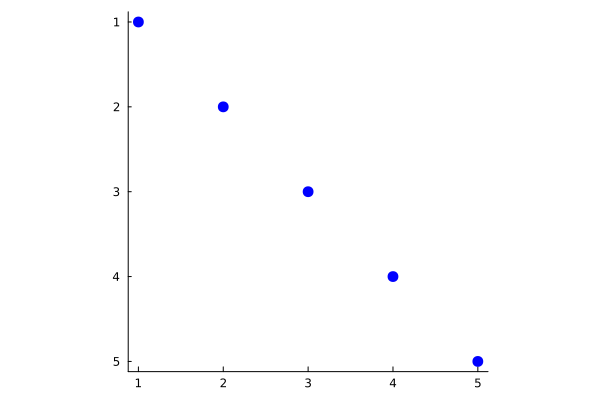

In [87]:
plt.spy(As;ms=6,mc=:blue)

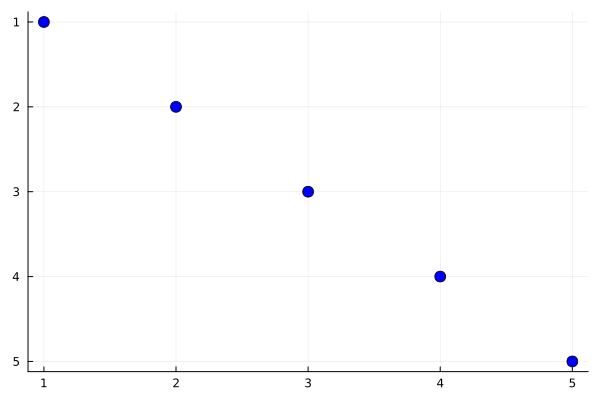

In [88]:
#Alternative
plt.scatter(I,J;ms=6,mc=:blue,yflip=true,label="")

In [89]:
spa.spzeros(3,5)

3×5 SparseArrays.SparseMatrixCSC{Float64, Int64} with 0 stored entries:
  ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅ 

In [90]:
Cs = spa.spdiagm(-2 => [1,2,3],1 => [2,4,-1,2])

5×5 SparseArrays.SparseMatrixCSC{Int64, Int64} with 7 stored entries:
 ⋅  2  ⋅   ⋅  ⋅
 ⋅  ⋅  4   ⋅  ⋅
 1  ⋅  ⋅  -1  ⋅
 ⋅  2  ⋅   ⋅  2
 ⋅  ⋅  3   ⋅  ⋅

In [91]:
Ds = spa.blockdiag(As,Bs,Cs)

13×19 SparseArrays.SparseMatrixCSC{Float64, Int64} with 15 stored entries:
⎡⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠀⠀⠁⠀⠂⠠⢀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⢌⠢⡀⎥
⎣⠀⠀⠀⠀⠀⠀⠀⠀⠁⠀⎦

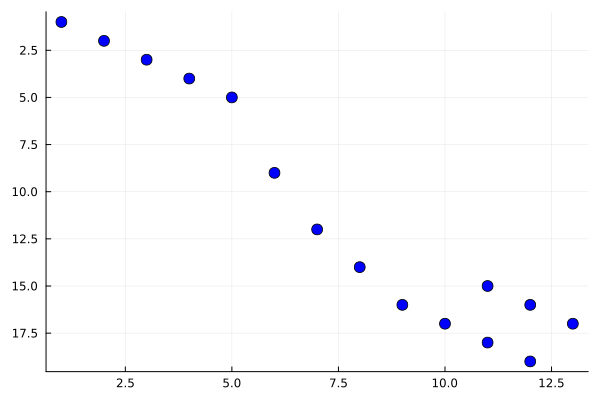

In [92]:
I,J,_ = spa.findnz(Ds)
plt.scatter(I,J;ms=6,mc=:blue,yflip=true,label="")

In [93]:
Bs

3×9 SparseArrays.SparseMatrixCSC{Int64, Int64} with 3 stored entries:
 ⋅  ⋅  ⋅  3  ⋅  ⋅   ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  12  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅   ⋅  ⋅  1

In [94]:
spa.rowvals(Bs)

3-element Vector{Int64}:
 1
 2
 3

In [95]:
Asr = spa.sprand(3,3,0.4)

3×3 SparseArrays.SparseMatrixCSC{Float64, Int64} with 3 stored entries:
  ⋅         ⋅    ⋅ 
 0.898948   ⋅    ⋅ 
 0.512623   ⋅   0.154731

In [96]:
I,J,V = spa.findnz(Asr)

([2, 3, 3], [1, 1, 3], [0.8989481624524839, 0.5126225424205453, 0.15473145974555813])

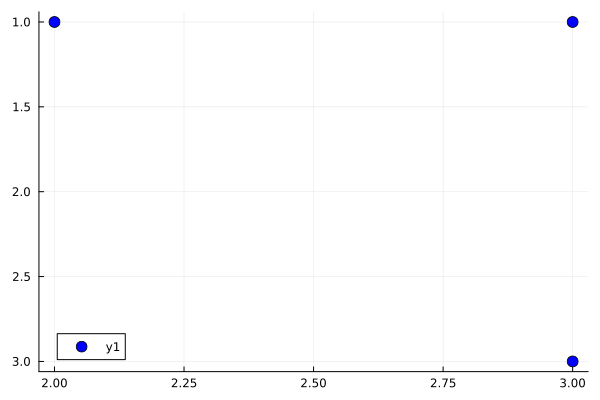

In [97]:
plt.scatter(I,J;ms=6,mc=:blue,yflip=true,legend=:bottomleft)

In [98]:
spa.sprandn(3,3,0.4)

3×3 SparseArrays.SparseMatrixCSC{Float64, Int64} with 4 stored entries:
 0.456616    ⋅         ⋅ 
 0.755726    ⋅         ⋅ 
  ⋅        -0.299125  1.576

### `OffsetArrays` package
In Julia, just like in FORTRAN and MATLAB, arrays are indexed from unity, while in C, Python, and other languages, arrays are indexed from zero.

Package `OffsetArrays.jl` allows us to index from arbitrary integer values. Because few functions are exported, we don't bother to create an alias.

* **Creating Offset Array 1** - `OffsetArray(A,idx1,idx2,...)` creates a new array of type "Offset Array" where, e.g., `idx1` can be `-1:3` if the original matrix `A` has indices going from `1:5`, etc. In general, the number of index elements must be the same for array `A` and the offset array in each axis. 
* **Creating Offset Array 2** `OffsetArray(A,dev1,dev2,...)` creates an offset array where the index in axis 1 is `dev1`, etc. As an example, if the original matrix has first axis `1:5`, the `OffsetArray(A,-2,...)` creates an offset matrix where the first axis indices are `-1:3`.
* **Creating Offset Array 3** `Origin(or)(A)` creates an absolute initial index (origin) `or` which is the same for all axes. Note: method `Origin` is not exported, so it is necessary to include the name space of the package.

Examples of use of Offset Arrays: when solving a PDE where the solution is found over a matrix `S` representing the system volume, the system cells are conveniently indexed starting at 1. When updating the model over the system volume with using stencils, these will at the edge go into the boundaries, and expect zero or negative indices - these system cells outside of the proper system are termed *ghost cells*. The system *with boundaries* ("ghost cells"), `SB`, may then be created as an OffsetArray to keep the indexing simple.

An other example can be when the array contains regression parameters, and it for some reason is convenient to change the index boundaries.

In [99]:
using OffsetArrays

In [100]:
S = rand(-9:9,3,5)

3×5 Matrix{Int64}:
 -4  -1   3   4   9
  3   7  -8  -4  -1
 -3   0   1   0  -9

In [101]:
OS = OffsetArray(S,0:2,0:4)

3×5 OffsetArray(::Matrix{Int64}, 0:2, 0:4) with eltype Int64 with indices 0:2×0:4:
 -4  -1   3   4   9
  3   7  -8  -4  -1
 -3   0   1   0  -9

In [102]:
OS[0,0], S[1,1]

(-4, -4)

In [103]:
SB = OffsetArray(zeros(5,7),-1,-1)

5×7 OffsetArray(::Matrix{Float64}, 0:4, 0:6) with eltype Float64 with indices 0:4×0:6:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [104]:
SB1 = OffsetArrays.Origin(0)(zeros(5,7))

5×7 OffsetArray(::Matrix{Float64}, 0:4, 0:6) with eltype Float64 with indices 0:4×0:6:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [105]:
I = CartesianIndices(S)

CartesianIndices((3, 5))

In [106]:
SB[I] .= S[I]

3×5 view(OffsetArray(::Matrix{Float64}, 0:4, 0:6), Base.OneTo(3), Base.OneTo(5)) with eltype Float64:
 -4.0  -1.0   3.0   4.0   9.0
  3.0   7.0  -8.0  -4.0  -1.0
 -3.0   0.0   1.0   0.0  -9.0

In [107]:
SB

5×7 OffsetArray(::Matrix{Float64}, 0:4, 0:6) with eltype Float64 with indices 0:4×0:6:
 0.0   0.0   0.0   0.0   0.0   0.0  0.0
 0.0  -4.0  -1.0   3.0   4.0   9.0  0.0
 0.0   3.0   7.0  -8.0  -4.0  -1.0  0.0
 0.0  -3.0   0.0   1.0   0.0  -9.0  0.0
 0.0   0.0   0.0   0.0   0.0   0.0  0.0

A relatively accurate correlation model for hydrogen specific heat capacity is proportional to $\sum_{j=0}^4 a_j\cdot T^j$ where $a_j$ are coefficients and $T$ is absolute temperature. We collect coefficients $a_0,\ldots,a_4$ into vector $a$. Because of the sum expression above, it is convenient to change the origin of the array to $0$.

In [108]:
a = OffsetArrays.Origin(0)([2.883,3.681e-3,-0.772e-5,0.692e-8,-0.213e-11])
f(T) = sum(j -> a[j]*T^j, 0:4)
#
f(300)

3.4620869999999995

### `Random` package
The `Random` package comes with standard Julia, but must be imported, and extends the support for random numbers, etc.

* **Random numbers** - `rand([S], [dims...])` produces random elements picked from "set" `S` into array of size given by integer dimensions `dims` (`dims...`, or "splash" `dims`  unpacks the elements of `dims` into a sequence of integers). The "set" `S` can be a tuple, an array, a set, a dictionary, other iterators, etc. It can also be datatypes, e.g., `Float64`, `Int`, etc. The default is `Float64` which is limited to the interval `[0,1)`. For integers (except `BigInts`), the range is the minimum value to the maximum value of the given integer type. 
* **Random permutation** - `randperm(n::Integer)` produces a random permutation of integers `1:n`.
* **Seeding generator** - `seed!(seed)` sets a seed value (`seed` may be skipped) for the random number generator. Setting a specific value for `seed`  makes it possible to produce a "deterministic" random number sequence

It is also possible to select random number generator algorithm, and several other random number algorithms are available.

In [109]:
import Random as rd

In [110]:
D = Dict("a" => [1,2,3], "b" => 5, "c" => "Hey Jude", "d" => 2+3im)

Dict{String, Any} with 4 entries:
  "c" => "Hey Jude"
  "b" => 5
  "a" => [1, 2, 3]
  "d" => 2+3im

In [111]:
rd.rand(D,4)

4-element Vector{Pair{String, Any}}:
 "c" => "Hey Jude"
 "d" => 2 + 3im
 "d" => 2 + 3im
 "b" => 5

In [112]:
C = range(plt.colorant"red",plt.colorant"blue",length=10)
rd.rand(C,5)

In [113]:
rd.randperm(3)

3-element Vector{Int64}:
 2
 1
 3

In [114]:
rd.rand(-9:9), rd.rand(-9:9), rd.rand(-9:9), rd.rand(-9:9)

(8, 1, 0, -6)

In [115]:
rd.rand(-9:9), rd.rand(-9:9), rd.rand(-9:9), rd.rand(-9:9)

(4, 1, 2, -3)

In [116]:
rd.seed!(5)
rd.rand(-9:9), rd.rand(-9:9), rd.rand(-9:9), rd.rand(-9:9)

(9, 8, -9, 1)

In [117]:
rd.seed!(5)
rd.rand(-9:9), rd.rand(-9:9), rd.rand(-9:9), rd.rand(-9:9)

(9, 8, -9, 1)

### `Statistics` package
The `Statistics` package provides basic functionality for computing statistics of data. 

* **Mean of collection** - `mean(itr;dims)` computes the mean over a collection. If the collection is an array, by default the mean is computed over all elements. If the mean is sought over a specific dimension, this dimension is specified by keyword `dims`.
* **Standard deviation** - `std(itr; corrected::Bool=true, mean=nothing[, dims])` computes the standard deviation of the collection. By default, this is the *corrected* standard deviation ($\frac{1}{n-1}\sum_1^n (x_i-\bar{x})^2$). To get the uncorrected distribution, set keyword `corrected` to `false`. It is possible to provide a pre-computed mean value by keyword `mean`.  If the collection is an array, by default the standard deviation is computed over all elements. If the standard deviation is sought over a specific dimension, this dimension is specified by keyword `dims`.
* **Variance** - `var(itr; corrected::Bool=true, mean=nothing[, dims])` finds the *variance* (square of standard deviation), with similar arguments as `std`.
* **Covariance** - `cov(x::AbstractVector, y::AbstractVector; corrected::Bool=true)` computes the covariance between vectors `x` and `y`. `cov(X::AbstractMatrix; dims::Int=1, corrected::Bool=true)` computes the covariance among vectors of array `X`. `cov(X::AbstractVecOrMat, Y::AbstractVecOrMat; dims::Int=1, corrected::Bool=true)` computes the covariance between elements in array `X` and array `Y`.
* **Correlation** - `cor(x::AbstractVector, y::AbstractVector)` computes the Pearson correlation between vector `x` and vector `y`. Similar arguments as for the covariance function is possible for correlation.
* **Median** - `median(itr; dimes)` computes the median over a collection.
* **Quantile** - `quantile(itr, p; sorted=false, alpha::Real=1.0, beta::Real=alpha)` computes the `p` quantile (scalar, or tuple of values) over a vector collection `itr`. If the data are sorted, setting keyword `sorted` to `true` may help the algorithm. There are a number of different quantile algorithms, which are specified by keywords `alpha` and `beta`. Following Hyndman, R.J and Fan, Y. (1996) "Sample Quantiles in Statistical Packages", The American Statistician, Vol. 50, No. 4, pp. 361-365, their Definitions 4-9 correcpond to:
- Def. 4: alpha=0, beta=1
- Def. 5: alpha=0.5, beta=0.5
- Def. 6: alpha=0, beta=0 (Excel PERCENTILE.EXC, Python default, Stata altdef)
- Def. 7: alpha=1, beta=1 (Julia, R and NumPy default, Excel PERCENTILE and PERCENTILE.INC, Python 'inclusive')
- Def. 8: alpha=1/3, beta=1/3
- Def. 9: alpha=3/8, beta=3/8

In [118]:
import Statistics as sta

In [119]:
x = rand(-9:9,10^3)
sta.mean(x)

0.061

In [120]:
sta.std(x), sta.std(x;corrected=false)

(5.4002260546611796, 5.397525266267867)

In [121]:
X = rand(5,10^3)

5×1000 Matrix{Float64}:
 0.183394  0.635689  0.52853   0.557642  …  0.771798   0.694802  0.534446
 0.856434  0.631772  0.683127  0.284082     0.797684   0.221213  0.46196
 0.382924  0.355842  0.324725  0.551662     0.0561009  0.356986  0.020814
 0.253456  0.26677   0.702624  0.942925     0.797108   0.143851  0.939909
 0.464731  0.357723  0.427086  0.522995     0.0694786  0.969813  0.301664

In [122]:
sta.mean(X)

0.5017811945156895

In [123]:
sta.mean(X;dims=2)

5×1 Matrix{Float64}:
 0.49562092366647115
 0.5094166593062067
 0.4982274225808832
 0.5231138502859723
 0.48252711673891296

In [124]:
sta.std(X;dims=2)

5×1 Matrix{Float64}:
 0.28365320403764094
 0.2934417010232463
 0.2950782244447049
 0.2896817213618654
 0.2824843481654099

In [125]:
sta.cor(X;dims=2)

5×5 Matrix{Float64}:
  1.0         0.0275024    0.0127902  -0.0431334   -0.0459689
  0.0275024   1.0         -0.0322195   0.00676144   0.0267468
  0.0127902  -0.0322195    1.0         0.0301877   -0.0518603
 -0.0431334   0.00676144   0.0301877   1.0          0.00169109
 -0.0459689   0.0267468   -0.0518603   0.00169109   1.0

In [126]:
sta.cov(X;dims=2)

5×5 Matrix{Float64}:
  0.0804591    0.00228918    0.00107054  -0.00354423   -0.00368338
  0.00228918   0.086108     -0.00278983   0.000574754   0.00221711
  0.00107054  -0.00278983    0.0870712    0.00258041   -0.00432282
 -0.00354423   0.000574754   0.00258041   0.0839155     0.000138382
 -0.00368338   0.00221711   -0.00432282   0.000138382   0.0797974

In [127]:
sta.median(X;dims=2)

5×1 Matrix{Float64}:
 0.4981056575359342
 0.510142433672783
 0.4822119651706684
 0.5329821477367043
 0.4725676126865455

In [128]:
sta.quantile(X[1,:],(0.05,0.95))

(0.05169682555066005, 0.9419563943688279)

### DataFrames and File Handling

#### Basic DataFrame construction
Package `DataFrames` provides an extension of 2D arrays/tabular data with some flexibility similar to sheets in Spreadsheets. In spreadsheets, typically each column has a specific name, and all elements in a columns are of the same type. But other columns may have a different type.

Julia's "DataFrames" are similar to "Dataframes" in R and "pandas" [panel data] in Python. Just as in spreadsheets, some cells in a dataframe may be empty. In Julia, empty cells have value `missing`.

* **Construction** - `DataFrame(assign1,assign2,...)`, with arguments separated by comma, and each argument consisting of assigning a column name to a 1D array of values. The dataframe is shown as a table with the column names as well as a numbering of the rows.
* **Addressing elements** - *Dot notation*: with dataframe `df` and column name `A`, this column can be addressed as `df.A`, `df."A"`, or `df.:A`. *Note*: although `:A` is a simple symbol, doing `df.Symbol("A")` does not work. *Array notation*: the column can be addressed as `df[:,"A"]`, `df[:,:A]`, `df[:,Symbol("A")]`, and `df[:,:var"A"]`. Note: `df[:,A]` does not work. The *array notation*  is more flexible than the *dot notation* because the array notation allows for specifying the column as a *variable*, while the dot notation does not. *Speed*: addressing columns by *symbols* is slightly faster than addressing them by strings.
* **Addressing column no.** - `df.A[:,n]` where `n` is an integer >= 1 addresses column no. *n*. 
* **Copying vs. in-place** - `df[:,"A"]` indicates all rows of column `A`, and implies that a copy of the dataframe is made. Just like for arrays, *slicing* is possible, e.g., `df[1:3,"A"]`, `df[1,2,5;"A"]`. To change values of the data-frame *in-place*, i.e., without making a copy, the syntax `df[!,"A"]` is used.
* **Finding column names** - `names(df)` returns a vector of column names as *strings*, while `propertynames(df)` returns a vector of column names as *symbols*.
* **Renaming column names** - `rename(df,v)` where `df` is a dataframe and `v` is a vector of changes of form `name_old => name_new`, where `name_j` is a symbol. The resulting dataframe is a *copy* of the original one. `rename!(df,v)` changes the names of dataframe `df`.
* **Column-wise construction** - if dataframe `df` exists (e.g., empty dataframe by `df = DataFrame()`), it can be populated column-wise by, e.g., `df.A = ...` and `df.B = ...`.
* **Row-wise construction** - if a dataframe `df` exists with specified column names and types (e.g., empty dataframe by `df = DataFrame(A = Int[], B = String[])`, additional rows may be added by `push!(df,row)` where `row` is a tuple or vector with number of elements matching the number of columns. Observe that row-wise construction of dataframes is considerably slower than batch construction or column-wise construction.
* **Allow for missing elements** - `allowmissing!(df)` changes a dataframe with specified data types for the columns so that missing elements are allowed in the columns. If a missing elements is allowed, this is indicated by column type followed by question mark, e.g., `String?`.
* **Changing values** - `replace(df, val1 => val2)` changes a value of `df` from `val1` to `val2`. A similar, in-place replacement `replace!` exists. Observe: it is required that all elements of `df` have the same eltype as `val1` - which must match the type of `val2`. Typically, this requires that the dataframe is sliced so only include columns with the same type.
* **Convert to array** - `Array(df)` converts the data frame to a matrix. Matrices do not allow for cells with type `missing`, so `missing` elements must be converted to something else first, e.g., `NaN`.
* **Jupyter notebook width** - `ENV["COLUMNS"]=N` changes the number of IJulia columns (default: 80) to `N`. This is useful in cases of data frames with many columns.

In [129]:
import DataFrames as daf

In [130]:
df = daf.DataFrame(A = 1:4, B = ["M","F","F","M"])

Row,A,B
,Int64,String
1,1,M
2,2,F
3,3,F
4,4,M


In [131]:
df[2:end,:var"A"]

3-element Vector{Int64}:
 2
 3
 4

In [132]:
df[end:-1:1, [:B, :A]]

Row,B,A
,String,Int64
1,M,4
2,F,3
3,F,2
4,M,1


In [133]:
daf.names(df)

2-element Vector{String}:
 "A"
 "B"

In [134]:
daf.propertynames(df)

2-element Vector{Symbol}:
 :A
 :B

In [135]:
df[:,daf.names(df)[2]]

4-element Vector{String}:
 "M"
 "F"
 "F"
 "M"

In [136]:
df[:,daf.propertynames(df)[1]]

4-element Vector{Int64}:
 1
 2
 3
 4

In [137]:
df.A = [2,4,6,8]

4-element Vector{Int64}:
 2
 4
 6
 8

In [138]:
df

Row,A,B
,Int64,String
1,2,M
2,4,F
3,6,F
4,8,M


In [139]:
# rename creates a copy
daf.rename!(df,:A => :Id, :B => :Gender)

Row,Id,Gender
,Int64,String
1,2,M
2,4,F
3,6,F
4,8,M


In [140]:
daf.push!(df,[10,"F"])

Row,Id,Gender
,Int64,String
1,2,M
2,4,F
3,6,F
4,8,M
5,10,F


In [141]:
daf.push!(df,[12,missing])     # you cannot add a `missing` type until it has been allowed

┌ Error: Error adding value to column :Gender. Maybe you forgot passing `promote=true`?
└ @ DataFrames C:\Users\Bernt_Lie\.julia\packages\DataFrames\58MUJ\src\dataframe\insertion.jl:697


MethodError: MethodError: Cannot `convert` an object of type Missing to an object of type String

Closest candidates are:
  convert(::Type{String}, !Matched::String)
   @ Base essentials.jl:298
  convert(::Type{T}, !Matched::T) where T<:AbstractString
   @ Base strings\basic.jl:231
  convert(::Type{T}, !Matched::AbstractString) where T<:AbstractString
   @ Base strings\basic.jl:232
  ...


In [142]:
daf.allowmissing!(df)

Row,Id,Gender
,Int64?,String?
1,2,M
2,4,F
3,6,F
4,8,M
5,10,F


In [143]:
daf.push!(df,[12,missing])
daf.push!(df,[missing,"F"])

Row,Id,Gender
,Int64?,String?
1,2,M
2,4,F
3,6,F
4,8,M
5,10,F
6,12,missing
7,missing,F


In [144]:
daf.replace!(df.Gender,"M" => "Male")
daf.replace!(df.Gender,"F" => "Female")
df

Row,Id,Gender
,Int64?,String?
1,2,Male
2,4,Female
3,6,Female
4,8,Male
5,10,Female
6,12,missing
7,missing,Female


In [145]:
daf.replace!(df.Gender,"Male" => "M")
daf.replace!(df.Gender,"Female" => "F")
df

Row,Id,Gender
,Int64?,String?
1,2,M
2,4,F
3,6,F
4,8,M
5,10,F
6,12,missing
7,missing,F


In [146]:
daf.replace!(df.Gender,missing => "")

7-element Vector{Union{Missing, String}}:
 "M"
 "F"
 "F"
 "M"
 "F"
 ""
 "F"

In [147]:
daf.replace!(df.Id,missing => 0)

7-element Vector{Union{Missing, Int64}}:
  2
  4
  6
  8
 10
 12
  0

In [148]:
Array(df)

7×2 Matrix{Any}:
  2  "M"
  4  "F"
  6  "F"
  8  "M"
 10  "F"
 12  ""
  0  "F"

#### File handling
"DataFrames" supports the `Table.jl` interface, and dataframes in Julia can therefore function as both source and sink for other tabular data structures such as named tuples, files, spreadsheets, databases, etc. To operate on "csv" files (Comma Separated Values file is an ASCII file type), package `CSV.jl` is needed.

* **Named tuple** - `DataFrame(v)` with `v` a vector of named tuples, where each element of `v` has the same names for the tuple elements, produces a dataframe with column names being the tuple names, and the tuple values being the column values, one row for each element in vector `v`. Converting from dataframe to named tuple requires `Tables.jl` function `rowtable(df)`.
* **CSV file write** - `CSV.write(filename, table; kwargs...)` writes `table` (e.g., `df`) to CSV file `filename` where `write` is a function in the `CSV.jl` package. Some useful keyword arguments are `delim::Union{Char, String}=','` which defaults to *comma* (`','`) and is a character or string (union of data types `Char` and `String`) specifying the separation symbol between elements - typical delimiters include `','`, `'\t'` (tabulator), `' '`, `'|'`, `';'`, and `':'`; `missingstring::String=""` which specifies a string for insertion in place of missing values in the `table`. The resulting csv file can, e.g., be opened and edited in Excel or other spreadsheet applicaitons.
* **CSV file read** - `CSV.read(filename,DataFrame;kwargs)` reads data from CSV file `filename` into a a `DataFrame` data type. Useful keyword arguments are `delim::Union{Char, String}=','` (see above). Function `CSV.read` will try to infer the datatype of the column, and may assume `missing` if it cannot infer the type. It is possible to specify a common type via keyword argument `type`, or a vector of types via keyword arguments `types`.

In [149]:
import Tables as tbl
import CSV

In [150]:
v = [(A = 1, B = "F"), (A = 2, B = "M"), (A = 3, B = "F"), (A = 4, B = "M")]

4-element Vector{NamedTuple{(:A, :B), Tuple{Int64, String}}}:
 (A = 1, B = "F")
 (A = 2, B = "M")
 (A = 3, B = "F")
 (A = 4, B = "M")

In [151]:
df1 = daf.DataFrame(v)    # package `Tables` is not needed here

Row,A,B
,Int64,String
1,1,F
2,2,M
3,3,F
4,4,M


In [152]:
tbl.rowtable(df1)    # package `Tables` is needed here

4-element Vector{NamedTuple{(:A, :B), Tuple{Int64, String}}}:
 (A = 1, B = "F")
 (A = 2, B = "M")
 (A = 3, B = "F")
 (A = 4, B = "M")

In [153]:
CSV.write("dataframe.csv", df)

"dataframe.csv"

In [154]:
df2=CSV.read("dataframe.csv",daf.DataFrame;delim=",")

Row,Id,Gender
,Int64,String1
1,2,M
2,4,F
3,6,F
4,8,M
5,10,F
6,12,missing
7,0,F


In [155]:
df

Row,Id,Gender
,Int64?,String?
1,2,M
2,4,F
3,6,F
4,8,M
5,10,F
6,12,
7,0,F


#### Joining DataFrames
Suppose we have two (or more) data frames, and need to *join* them. `DataFrames` allows for 7 types of joins:
The following functions are provided to perform seven kinds of joins. 

* **Inner Join** - `innerjoin(df1,df2,on=col)` joins `df1` and `df2` which have common column name `col` (symbol), resulting in a data frame that contains rows where the `col` values exist in both (all) passed data frames.
* **Left Join** - `leftjoin(df1,df2,on=col)` joins `df1` and `df2` which have common column name `col` (symbol) resulting in a data frame that contains rows where the `col` values exist in the first (left) argument, whether or not that value exists in the second (right) argument.
* **Right Join** - `rightjoin(df1,df2,on=col)` joins `df1` and `df2` which have common column name `col` (symbol) resulting in a data frame that contains rows where the `col` values exist in the second (right) argument, whether or not that value exists in the first (left) argument.
* **Outer Join** - `outerjoin(df1,df2,on=col)` joins `df1` and `df2` which have common column name `col` (symbol) resulting in a data frame that contains rows where the `col` values exist in any of the passed data frames.
* **Semi Join** - `semijoin(df1,df2,on=col)`: Like an inner join, but output is restricted to columns from the first (left) argument.
* **Anti Join** - `antijoin(df1,df2,on=col)`: The output contains rows for values of the key that exist in the first (left) but not the second (right) argument. As with semijoin, output is restricted to columns from the first (left) argument.
* **Cross Join** - `crossjoin(df1,df2,makeunique=true)`: The output is the cartesian product of rows from all passed data frames.

In [156]:
people = daf.DataFrame(ID = [20, 40], Name = ["John Doe", "Jane Doe"])

Row,ID,Name
,Int64,String
1,20,John Doe
2,40,Jane Doe


In [157]:
jobs = daf.DataFrame(ID = [20, 60], Job = ["Lawyer", "Astronaut"])

Row,ID,Job
,Int64,String
1,20,Lawyer
2,60,Astronaut


In [158]:
daf.innerjoin(people, jobs, on = :ID)

Row,ID,Name,Job
,Int64,String,String
1,20,John Doe,Lawyer


In [159]:
daf.leftjoin(people, jobs, on = :ID)

Row,ID,Name,Job
,Int64,String,String?
1,20,John Doe,Lawyer
2,40,Jane Doe,missing


In [160]:
daf.rightjoin(people, jobs, on = :ID)

Row,ID,Name,Job
,Int64,String?,String
1,20,John Doe,Lawyer
2,60,missing,Astronaut


In [161]:
daf.outerjoin(people, jobs, on = :ID)

Row,ID,Name,Job
,Int64,String?,String?
1,20,John Doe,Lawyer
2,40,Jane Doe,missing
3,60,missing,Astronaut


In [162]:
daf.semijoin(people, jobs, on = :ID)

Row,ID,Name
,Int64,String
1,20,John Doe


In [163]:
daf.antijoin(people, jobs, on = :ID)

Row,ID,Name
,Int64,String
1,40,Jane Doe


In [164]:
daf.crossjoin(people, jobs, makeunique=true)

Row,ID,Name,ID_1,Job
,Int64,String,Int64,String
1,20,John Doe,20,Lawyer
2,20,John Doe,60,Astronaut
3,40,Jane Doe,20,Lawyer
4,40,Jane Doe,60,Astronaut


#### Closing
The `DataFrames.jl` package is a very rich package, and the above has just scratched the surface of possibilities. For more details, search for `DataFrames.jl` on the internet to find the documentation.